In [1]:
import pandas as pd
import numpy as np

In [3]:
a = pd.read_csv(r'C:\Users\2106-017\Desktop\서울시_행정구역\make\prac.csv', encoding='cp949')
a.drop('Unnamed: 0', inplace=True, axis=1)
a

,name,addr
0,청운효자동 주민센터,서울특별시 종로구 자하문로 92
1,사직동 주민센터,서울특별시 종로구 사직로9길 1
2,종로1-4가동 주민센터,서울특별시 종로구 종로17길 8
3,삼청동 주민센터,서울특별시 종로구 삼청로 107
4,가회동 주민센터,서울특별시 종로구 북촌로 35
5,종로5-6가동 주민센터,서울특별시 종로구 종로35가길 19
6,이화동 주민센터,서울특별시 종로구 이화장길 33
7,혜화동 주민센터,서울특별시 종로구 혜화로 12
8,창신1동 주민센터,서울특별시 종로구 지봉로 8-6
9,창신2동 주민센터,서울특별시 종로구 창신길 62


In [5]:
from geopy.geocoders import Nominatim

In [9]:
address = a['addr']

geo_local = Nominatim(user_agent='South Korea')

def geocoding(address):
    geo = geo_local.geocode(address)
    x_y = [geo.latitude, geo.longitude]
    return x_y

In [10]:
latitude = []
longitude = []

for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])
    

In [12]:
a['lat'] = latitude
a['lon'] = longitude

In [13]:
a

,name,addr,lat,lon
0,청운효자동 주민센터,서울특별시 종로구 자하문로 92,37.584083,126.970636
1,사직동 주민센터,서울특별시 종로구 사직로9길 1,37.576191,126.968829
2,종로1-4가동 주민센터,서울특별시 종로구 종로17길 8,37.570728,126.988912
3,삼청동 주민센터,서울특별시 종로구 삼청로 107,37.584979,126.981782
4,가회동 주민센터,서울특별시 종로구 북촌로 35,37.580025,126.984805
5,종로5-6가동 주민센터,서울특별시 종로구 종로35가길 19,37.572038,127.005066
6,이화동 주민센터,서울특별시 종로구 이화장길 33,37.576975,127.004316
7,혜화동 주민센터,서울특별시 종로구 혜화로 12,37.586829,127.000602
8,창신1동 주민센터,서울특별시 종로구 지봉로 8-6,37.579574,127.015270
9,창신2동 주민센터,서울특별시 종로구 창신길 62,37.572705,127.010773


In [15]:
import folium
import re

In [27]:
m = folium.Map(
    location = (sum(a['lat'])/len(a['lat']), sum(a['lon'])/len(a['lon']) ),
    tiles = 'cartodbpositron',
    zoom_start = 11
)

In [45]:
for i in range(a.shape[0]):
    c = a.iat[i,2],a.iat[i,3]
    folium.Marker(c).add_to(m)

In [43]:
folium.Marker((37.584979,126.981782)).add_to(m)

In [48]:
m

In [ ]:
colo = {1:'white', 2,'black'}

In [47]:
help(folium.Icon)

Help on class Icon in module folium.map:

class Icon(branca.element.MacroElement)
 |  Icon(color='blue', icon_color='white', icon='info-sign', angle=0, prefix='glyphicon', **kwargs)
 |  
 |  Creates an Icon object that will be rendered
 |  using Leaflet.awesome-markers.
 |  
 |  Parameters
 |  ----------
 |  color : str, default 'blue'
 |      The color of the marker. You can use:
 |  
 |          ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
 |           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
 |           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
 |           'gray', 'black', 'lightgray']
 |  
 |  icon_color : str, default 'white'
 |      The color of the drawing on the marker. You can use colors above,
 |      or an html color code.
 |  icon : str, default 'info-sign'
 |      The name of the marker sign.
 |      See Font-Awesome website to choose yours.
 |      Warning : depending on the icon you choose you may need to adapt
 |      the `

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb
from matplotlib import rc

%matplotlib inline

rc('font', family='HANDotum')
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'HANDotum'

In [161]:
kmeans = KMeans(n_clusters=3, random_state=1234).fit(add_kmean)

In [156]:
add = pd.read_excel(r'C:\Users\2106-017\Documents\카카오톡 받은 파일\전체동.xlsx')

In [157]:
add.drop('Unnamed: 0', inplace=True, axis=1)

In [158]:
in_col = ['출생', '사망', '전입', '전출', '혼인', '이혼']
add_kmean = add[in_col]
add_kmean

,출생,사망,전입,전출,혼인,이혼
0,17,29,829,937,12,13
1,152,57,9853,4191,61,28
2,91,57,4408,3308,91,41
3,93,81,5141,5967,112,45
4,102,76,4171,4824,87,40
...,...,...,...,...,...,...
422,126,96,4437,4029,160,44
423,183,249,3719,4709,95,49
424,132,139,2182,2903,74,39
425,131,118,2619,3157,98,34


In [159]:
kmeans.cluster_centers_

array([[1.29065934e+02, 1.21082418e+02, 3.65201099e+03, 4.10719231e+03,
        9.77802198e+01, 3.97252747e+01, 4.47802198e+00],
       [7.47934783e+01, 8.57608696e+01, 1.97829891e+03, 2.29375000e+03,
        5.70108696e+01, 2.60271739e+01, 3.88043478e+00],
       [1.74000000e+02, 1.33929825e+02, 6.77026316e+03, 6.15726316e+03,
        1.50736842e+02, 5.10526316e+01, 7.52631579e+00]])

In [162]:
add_kmean['cluster'] = kmeans.labels_
add_kmean

C:\Users\2106-017\AppData\Local\Temp/ipykernel_317456/901656379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_kmean['cluster'] = kmeans.labels_


,출생,사망,전입,전출,혼인,이혼,cluster
0,17,29,829,937,12,13,0
1,152,57,9853,4191,61,28,1
2,91,57,4408,3308,91,41,2
3,93,81,5141,5967,112,45,1
4,102,76,4171,4824,87,40,2
...,...,...,...,...,...,...,...
422,126,96,4437,4029,160,44,2
423,183,249,3719,4709,95,49,2
424,132,139,2182,2903,74,39,0
425,131,118,2619,3157,98,34,0


In [171]:
add_kmean['cluster'].value_counts()

2    199
0    168
1     60
Name: cluster, dtype: int64

In [164]:
add['cluster'] = add_kmean['cluster']

In [165]:
add

,동,자치구,출생,사망,전입,전출,혼인,이혼,cluster,주민센터 이름,주민센터 주소,위도,경도
0,개포1동,강남구,17,29,829,937,12,13,0,개포1동 주민센터,서울특별시 강남구 개포로 310-17,37.481054,127.053708
1,개포2동,강남구,152,57,9853,4191,61,28,1,개포2동 주민센터,서울특별시 강남구 개포로 511,37.489774,127.069120
2,개포4동,강남구,91,57,4408,3308,91,41,2,개포4동 주민센터,서울특별시 강남구 개포로38길 12,37.478999,127.051657
3,논현1동,강남구,93,81,5141,5967,112,45,1,논현1동 주민센터,서울특별시 강남구 학동로20길 25,37.511555,127.028446
4,논현2동,강남구,102,76,4171,4824,87,40,2,논현2동 주민센터,서울특별시 강남구 학동로43길 17,37.517375,127.037196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,상봉2동,중랑구,126,96,4437,4029,160,44,2,상봉2동 주민센터,서울특별시 중랑구 봉우재로 93-5,37.589362,127.074210
423,신내1동,중랑구,183,249,3719,4709,95,49,2,신내1동 주민센터,서울특별시 중랑구 용마산로129나길 35,37.605930,127.099529
424,신내2동,중랑구,132,139,2182,2903,74,39,0,신내2동 주민센터,서울특별시 중랑구 봉화산로 190,37.606256,127.094209
425,중화1동,중랑구,131,118,2619,3157,98,34,0,중화1동 주민센터,서울특별시 중랑구 동일로134길 17,37.601147,127.080641


In [166]:
m = folium.Map(
    location = (sum(add['위도'])/len(add['위도']), sum(add['경도'])/len(add['경도']) ),
    tiles = 'cartodbdark_matter',
    zoom_start = 11.5
)

In [167]:
for i in range(add.shape[0]):
    
    if add['cluster'][i] == 0:
        color = 'blue'
    elif add['cluster'][i] == 1:
        color = 'red'
    elif add['cluster'][i] == 2:
        color = 'green'
    else :
        pass
    c = add.iat[i,11],add.iat[i,12]
    folium.Circle(c, popup=add['cluster'][i], color = color).add_to(m)

In [168]:
m

In [169]:
m.save('map_3.html')

In [142]:
m.save('map.jpg')

C:\Users\2106-017\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='전입', ylabel='전출'>

C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52636 

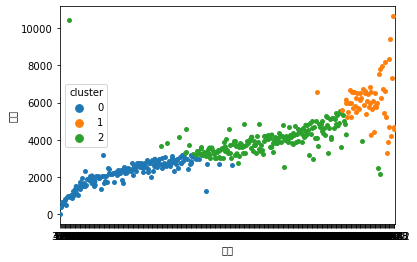

In [178]:
sb.swarmplot(x=add['전입'], y=add['전출'], hue=add['cluster'])

C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51

C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51077 missin

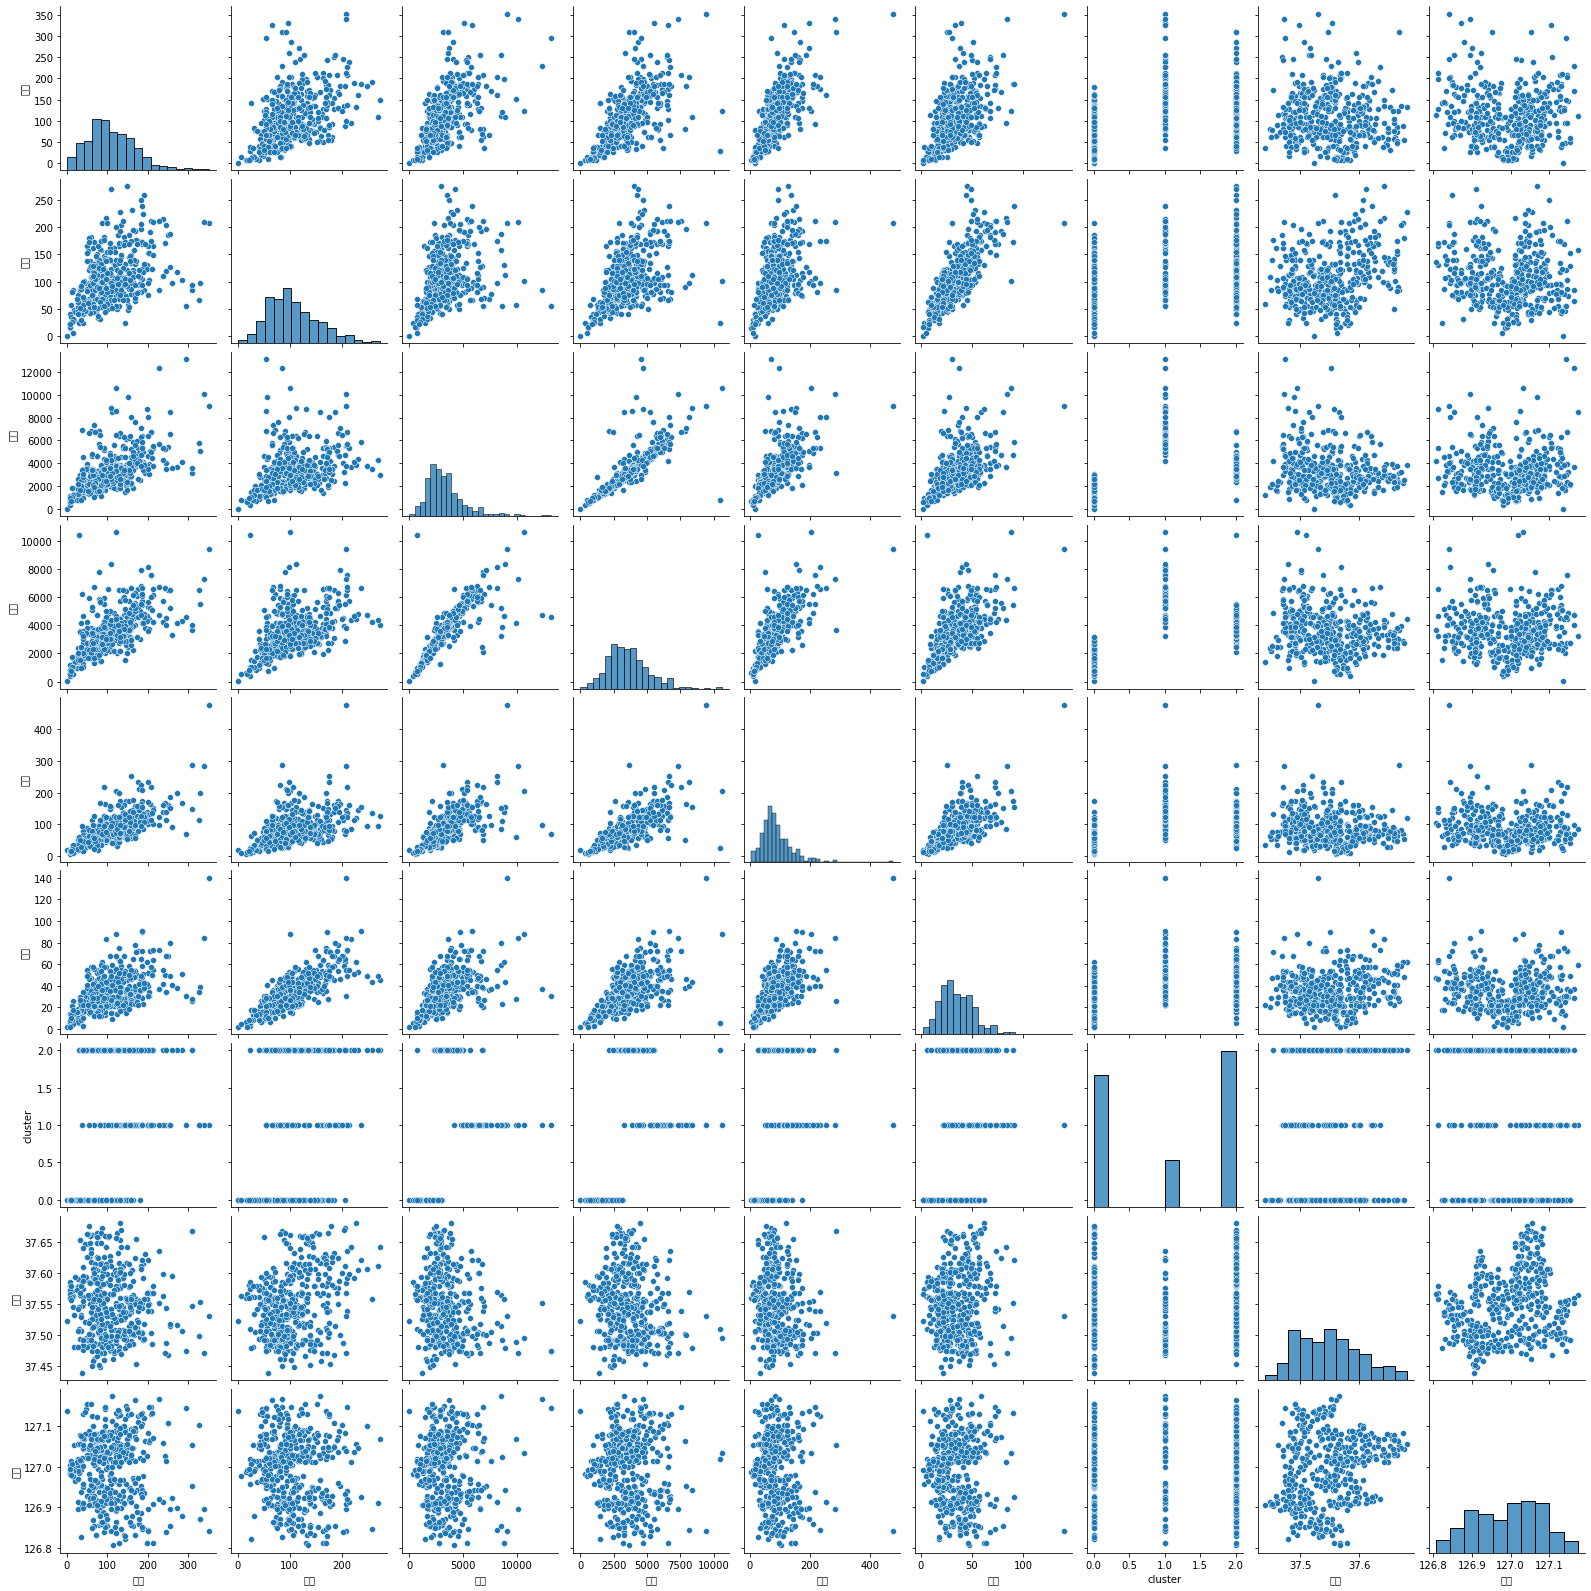

In [189]:
sb.pairplot(add)

<AxesSubplot:xlabel='전입', ylabel='전출'>

C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2106-017\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52636 

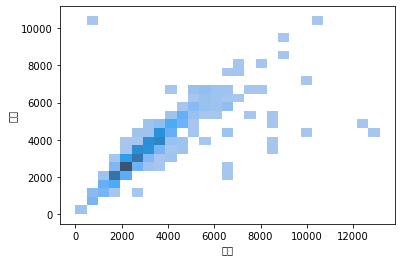

In [191]:
sb.histplot(x=add['전입'], y=add['전출'])

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

<AxesSubplot:xlabel='전입', ylabel='전출'>

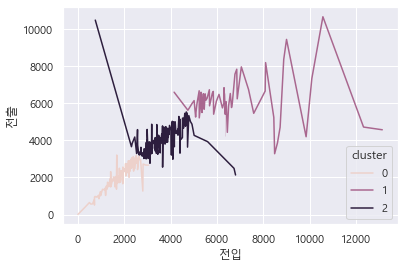

In [199]:
sns.lineplot(x=add['전입'], y=add['전출'], hue=add['cluster'])